### Goal: understand time series forecasting

In [586]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [587]:
tunnel_df = pd.read_csv("../ts-course-data/tunnel.csv", index_col="Day", parse_dates=True)

In [588]:
tunnel_df.head(5)

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [589]:
tunnel_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 747 entries, 2003-11-01 to 2005-11-16
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   NumVehicles  747 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


Lets look at the time series below. 
1. First, we will start with the time step feature. Time-step features lets us model time dependence. A series is time dependent if its values can be predicted from the time they occured.
2. Second, we will look at the lag feature. Lag features lets us model series dependence. A time series has serial dependence when an observation can be predicted from previous observations.

In [590]:
tunnel_df["Time_step"] = np.arange(0, len(tunnel_df), 1)

In [591]:
tunnel_df.shape

(747, 2)

In [592]:
tunnel_df.head(5)

,NumVehicles,Time_step
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


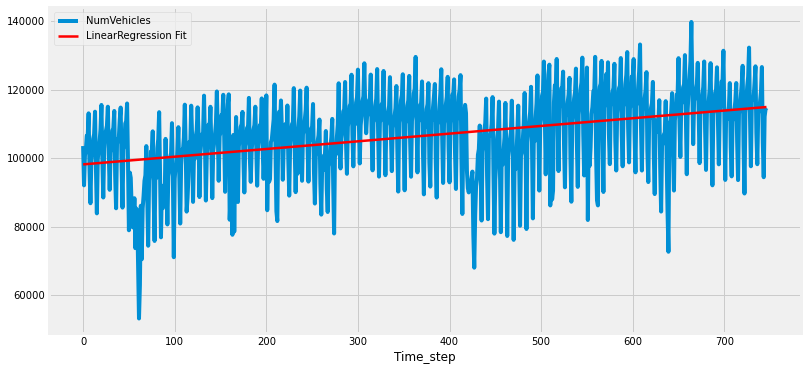

In [593]:
tunnel_df.plot("Time_step", "NumVehicles", figsize=(12, 6))
m,b = np.polyfit(tunnel_df["Time_step"], tunnel_df["NumVehicles"], 1)
x = tunnel_df["Time_step"]
plt.plot(x, m*x + b, color = "red", linewidth = 2.5, label = "LinearRegression Fit")
plt.legend()
plt.show()

In [594]:
# perform linear regression on the time_step feature

from sklearn.linear_model import LinearRegression

X = tunnel_df.loc[:, ["Time_step"]]
y = tunnel_df.loc[:, "NumVehicles"]

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
y_pred = pd.Series(y_pred, index = X.index)
y_pred.head(5)

Day
2003-11-01    98176.206344
2003-11-02    98198.703794
2003-11-03    98221.201243
2003-11-04    98243.698693
2003-11-05    98266.196142
dtype: float64

In [595]:
tunnel_df.head()

,NumVehicles,Time_step
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


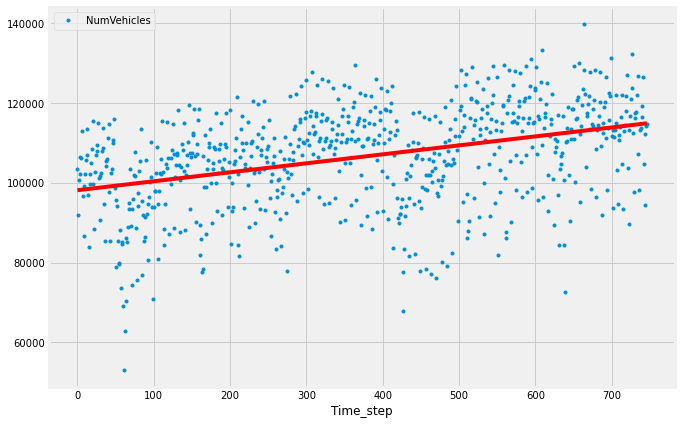

In [596]:
tunnel_df.plot(x = "Time_step", y = "NumVehicles", figsize = (10, 7), style = ".")
plt.plot(X["Time_step"], y_pred, color = "red", linewidth = 4)
plt.show()

In [597]:
tunnel_df = pd.read_csv("../ts-course-data/tunnel.csv", index_col="Day", parse_dates=True)
tunnel_df["NumVehicles"] = tunnel_df["NumVehicles"].astype(float)
tunnel_df["Lag"] = tunnel_df["NumVehicles"].shift(1)
tunnel_df.head(5)

,NumVehicles,Lag
Day,,
2003-11-01,103536.0,NaN
2003-11-02,92051.0,103536.0
2003-11-03,100795.0,92051.0
2003-11-04,102352.0,100795.0
2003-11-05,106569.0,102352.0


In [598]:
#tunnel_df = tunnel_df.reindex(columns = ["NumVehicles", "Lag"])
tunnel_df = tunnel_df.dropna()
tunnel_df.head(5)

,NumVehicles,Lag
Day,,
2003-11-02,92051.0,103536.0
2003-11-03,100795.0,92051.0
2003-11-04,102352.0,100795.0
2003-11-05,106569.0,102352.0
2003-11-06,106284.0,106569.0


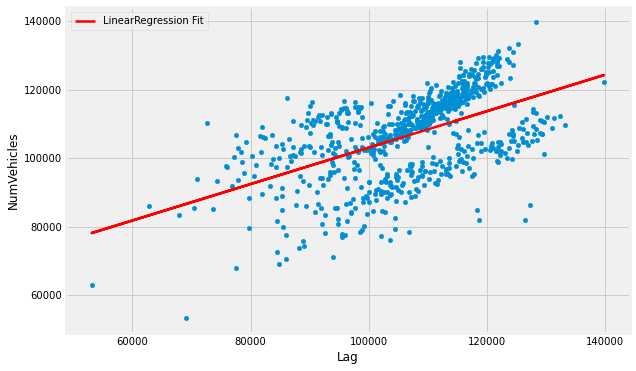

In [599]:
tunnel_df.plot.scatter("Lag", "NumVehicles", figsize=(9, 6))
m,b = np.polyfit(tunnel_df["Lag"], tunnel_df["NumVehicles"], 1)
x = tunnel_df["Lag"]
plt.plot(x, m*x + b, color = "red", linewidth = 2.5, label = "LinearRegression Fit")
plt.legend()
plt.show()

In [600]:
X = tunnel_df.loc[:, ["Lag"]]
y = tunnel_df.loc[:, "NumVehicles"]

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
y_pred = pd.Series(y_pred, index = X.index)
y_pred.head(5)


Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
dtype: float64

In [601]:
y_pred.head(5)

Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
dtype: float64

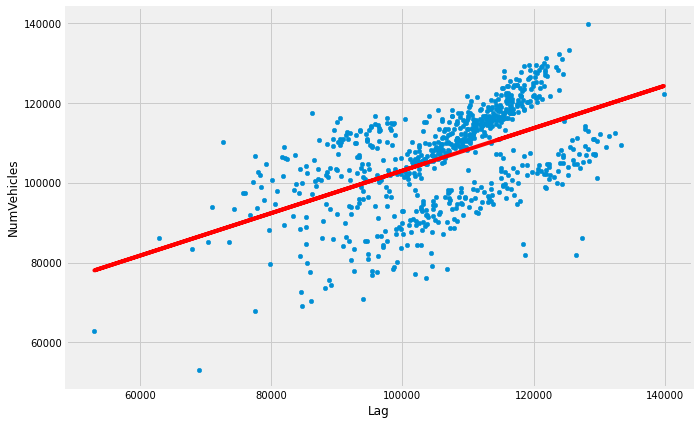

In [602]:
tunnel_df.plot.scatter(x = "Lag", y = "NumVehicles", figsize = (10, 7), style = ".")
plt.plot(X["Lag"], y_pred, color = "red", linewidth = 4)
plt.show()

We looked at the Time_step and Lag features. Looks like there is a relation. So we can use them as features.

### Now lets look at the trend
In order to understand the trend, lets start with calculating a rolling mean
If the trend discovered by our LinearRegression model is almost identical to the moving average plot, it would suggest that a linear trend was the right decision in this case.

In [603]:
# perform window operation
tunnel_df = pd.read_csv("../ts-course-data/tunnel.csv", index_col="Day", parse_dates=True)

moving_average = tunnel_df[["NumVehicles"]].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean() 

In [604]:
moving_average.head(5)

,NumVehicles
Day,
2003-11-01,99127.426230
2003-11-02,99094.489130
2003-11-03,99112.481081
2003-11-04,99146.639785
2003-11-05,99196.122995


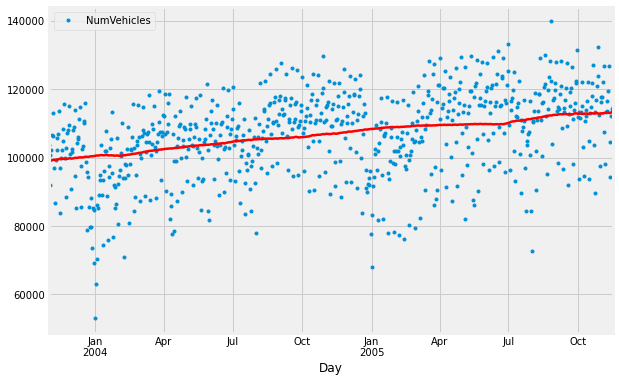

In [605]:
tunnel_df.plot(y = "NumVehicles", style = ".", figsize=(9, 6))
plt.plot(moving_average["NumVehicles"], linewidth = 2.5, color = "red")
plt.show()

In [606]:
tunnel_df = pd.read_csv("../ts-course-data/tunnel.csv", index_col="Day", parse_dates=True)
tunnel_df.index

DatetimeIndex(['2003-11-01', '2003-11-02', '2003-11-03', '2003-11-04',
               '2003-11-05', '2003-11-06', '2003-11-07', '2003-11-08',
               '2003-11-09', '2003-11-10',
               ...
               '2005-11-07', '2005-11-08', '2005-11-09', '2005-11-10',
               '2005-11-11', '2005-11-12', '2005-11-13', '2005-11-14',
               '2005-11-15', '2005-11-16'],
              dtype='datetime64[ns]', name='Day', length=747, freq=None)

In [607]:
# Now lets fit a LinearRegression model
from statsmodels.tsa.deterministic import DeterministicProcess
tunnel_df = tunnel_df.asfreq("D")
dp = DeterministicProcess(
    index=tunnel_df.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [608]:
from sklearn.linear_model import LinearRegression

y = tunnel_df["NumVehicles"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [609]:
y_pred.head()

Day
2003-11-01    98176.206344
2003-11-02    98198.703794
2003-11-03    98221.201243
2003-11-04    98243.698693
2003-11-05    98266.196142
Freq: D, dtype: float64

In [610]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

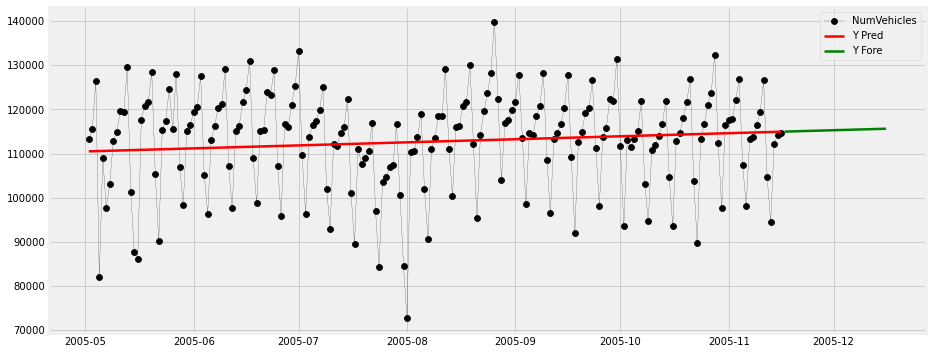

In [611]:
filtered_tunnel_df = tunnel_df[tunnel_df.index > "2005-05"]
filtered_y_pred = y_pred[y_pred.index > "2005-05"]
#filtered_tunnel_df = tunnel_df.copy()
#filtered_y_pred = y_pred.copy()
plt.figure(figsize = (14, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(filtered_tunnel_df["NumVehicles"], color = 'black', alpha = 1, marker = 'o', markeredgewidth = 0.8, markeredgecolor = "black", linewidth = 0.2, label = "NumVehicles")
ax.plot(filtered_y_pred, label = "Y Pred", color = "red", linewidth = 2.5)
ax.plot(y_fore, label = "Y Fore", color = "green", linewidth = 2.5)
plt.legend()
plt.show()

Looks like there was a linear trend which was established by our model.

### Now lets look at the seasonality
We say that a time series exhibits seasonality whenever there is a regular, periodic change in the mean of the series. Seasonal changes generally follow the clock and calendar -- repetitions over a day, a week, or a year are common. Seasonality is often driven by the cycles of the natural world over days and years or by conventions of social behavior surrounding dates and times.

In [612]:
tunnel_df = pd.read_csv("../ts-course-data/tunnel.csv", index_col="Day", parse_dates=True)
tunnel_df = tunnel_df.asfreq("D")

In [613]:
tunnel_df.head(5)

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


Lets look at the seasonal plot over the week and over the year

In [614]:
X = tunnel_df.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year

<ipython-input-614-17b132c4a117>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X["week"] = X.index.week  # the seasonal period (period)


In [615]:
X.head(10)

,NumVehicles,day,week,dayofyear,year
Day,,,,,
2003-11-01,103536,5,44,305,2003
2003-11-02,92051,6,44,306,2003
2003-11-03,100795,0,45,307,2003
2003-11-04,102352,1,45,308,2003
2003-11-05,106569,2,45,309,2003
2003-11-06,106284,3,45,310,2003
2003-11-07,113111,4,45,311,2003
2003-11-08,96806,5,45,312,2003
2003-11-09,86811,6,45,313,2003


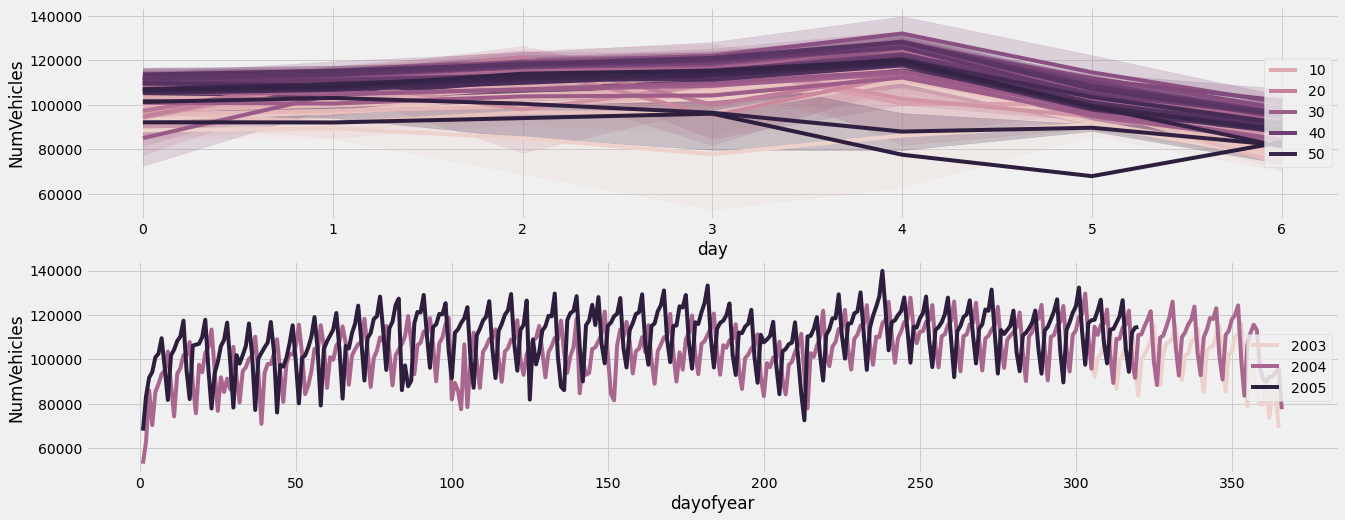

In [616]:
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20, 8))

ax0 = plt.subplot(2, 1, 1)
ax1 = plt.subplot(2, 1, 2)
sns.lineplot(data = X, x = "day", y = "NumVehicles", hue = "week", ax = ax0)
sns.lineplot(data = X, x = "dayofyear", y = "NumVehicles", hue = "year", ax = ax1)
ax0.legend(loc="right")
ax1.legend(loc="right")
plt.show()

We took a look at seasonal plots over a week and over a year.
Now lets look at periodogram

In [617]:
# plot periodogram

from scipy.signal import periodogram
fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
freqencies, spectrum = periodogram(
    tunnel_df["NumVehicles"],
    fs=fs,
    detrend="linear",
    window="boxcar",
    scaling='spectrum',
)

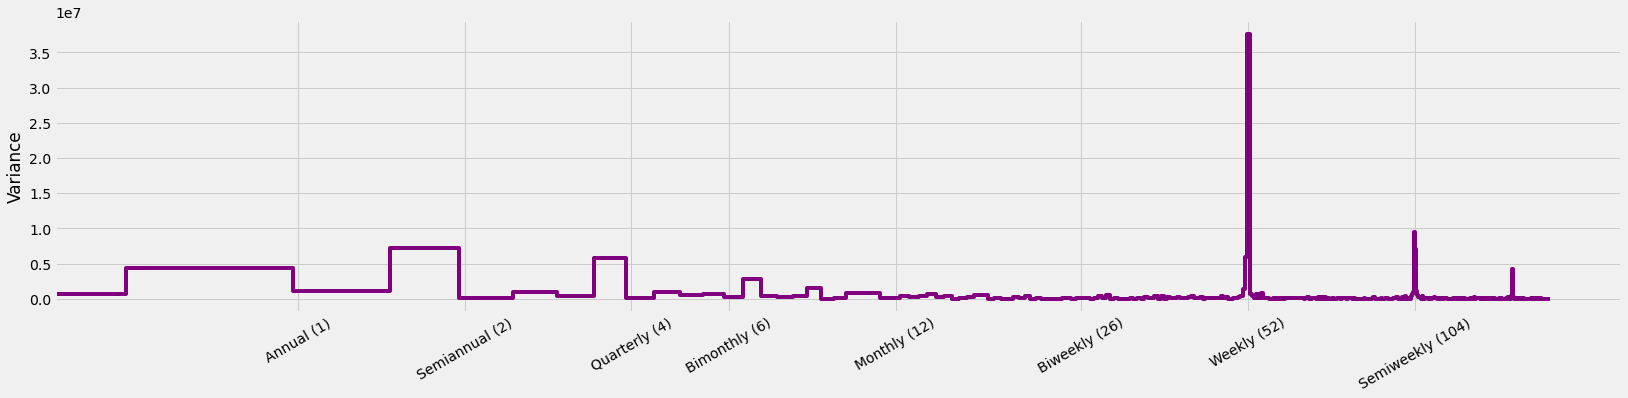

In [655]:
plt.figure(figsize = (25, 5))
ax = plt.subplot(1, 1, 1)
ax.step(freqencies, spectrum, color="purple")
ax.set_xscale("log")
ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
ax.set_xticklabels(
    [
        "Annual (1)",
        "Semiannual (2)",
        "Quarterly (4)",
        "Bimonthly (6)",
        "Monthly (12)",
        "Biweekly (26)",
        "Weekly (52)",
        "Semiweekly (104)",
    ],
    rotation=30,
)
ax.set_ylabel("Variance")
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.show()

The periodogram agrees with the seasonal plots above: a strong weekly season and a weaker annual season. The weekly season we'll model with indicators and the annual season with Fourier features. From right to left, the periodogram falls off between Bimonthly (6) and Monthly (12), so let's use 10 Fourier pairs.

We'll create our seasonal features using DeterministicProcess, the same utility we used in Lesson 2 to create trend features. To use two seasonal periods (weekly and annual), we'll need to instantiate one of them as an "additional term":

In [619]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=tunnel_df.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample() 

In [620]:
X.head()

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=A-DEC)","cos(1,freq=A-DEC)",...,"sin(6,freq=A-DEC)","cos(6,freq=A-DEC)","sin(7,freq=A-DEC)","cos(7,freq=A-DEC)","sin(8,freq=A-DEC)","cos(8,freq=A-DEC)","sin(9,freq=A-DEC)","cos(9,freq=A-DEC)","sin(10,freq=A-DEC)","cos(10,freq=A-DEC)"
Day,,,,,,,,,,,,,,,,,,,,,
2003-11-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.867456,0.497513,...,-0.017213,0.999852,-0.875892,0.482508,-0.854322,-0.519744,0.025818,-0.999667,0.880012,-0.474951
2003-11-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.858764,0.512371,...,0.085965,0.996298,-0.811539,0.584298,-0.917584,-0.397543,-0.128748,-0.991677,0.785650,-0.618671
2003-11-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.849817,0.527078,...,0.188227,0.982126,-0.735417,0.677615,-0.963471,-0.267814,-0.280231,-0.959933,0.668064,-0.744104
2003-11-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.840618,0.541628,...,0.288482,0.957485,-0.648630,0.761104,-0.991114,-0.133015,-0.425000,-0.905193,0.530730,-0.847541
2003-11-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.831171,0.556017,...,0.385663,0.922640,-0.552435,0.833556,-0.999991,0.004304,-0.559589,-0.828770,0.377708,-0.925925


In [621]:
y = tunnel_df["NumVehicles"]

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

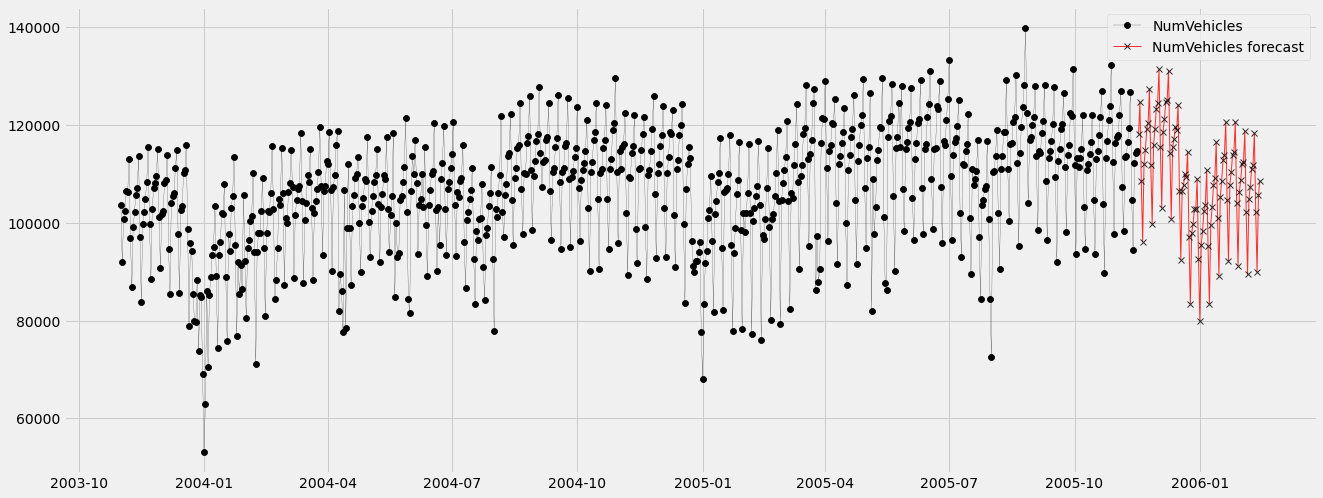

In [622]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20, 8))
ax = plt.subplot(1, 1, 1)
ax.plot(tunnel_df["NumVehicles"], color = 'black', alpha = 1, marker = 'o', markeredgewidth = 0.8, markeredgecolor = "black", linewidth = 0.2, label = "NumVehicles")
ax.plot(y_fore, color = "red", label = "NumVehicles forecast", marker = "x", alpha = 0.8, linewidth = 1, markeredgecolor = "black")
plt.legend()
plt.show()


Until now we looked at time dependent features, meaning variables that could easily be derived from time index.
Below we will look at the serial dependence. Meaning target variables that depend on the lag or the prior observed value.

What distinguishes cyclic behavior from seasonality is that cycles are not necessarily time dependent, as seasons are. What happens in a cycle is less about the particular date of occurence, and more about what has happened in the recent past.

In [625]:
tunnel_df = pd.read_csv("../ts-course-data/tunnel.csv", index_col="Day", parse_dates=True)
tunnel_df["lag_1"] = tunnel_df["NumVehicles"].shift(1)
tunnel_df["lag_2"] = tunnel_df["NumVehicles"].shift(2)
tunnel_df["lag_3"] = tunnel_df["NumVehicles"].shift(3)
tunnel_df["lag_4"] = tunnel_df["NumVehicles"].shift(4)

In [626]:
tunnel_df.head(5)

,NumVehicles,lag_1,lag_2,lag_3,lag_4
Day,,,,,
2003-11-01,103536,NaN,NaN,NaN,NaN
2003-11-02,92051,103536.0,NaN,NaN,NaN
2003-11-03,100795,92051.0,103536.0,NaN,NaN
2003-11-04,102352,100795.0,92051.0,103536.0,NaN
2003-11-05,106569,102352.0,100795.0,92051.0,103536.0


In [628]:
tunnel_df.corr()[["NumVehicles"]]

,NumVehicles
NumVehicles,1.000000
lag_1,0.532835
lag_2,0.186562
lag_3,0.141476
lag_4,0.123223


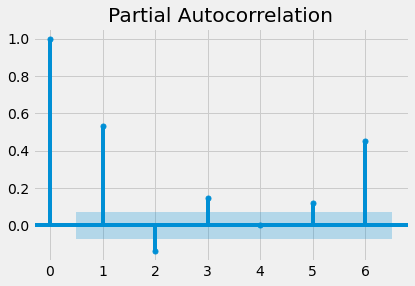

In [652]:
# lets plot partial auto correlation

from statsmodels.graphics.tsaplots import plot_pacf
_ = plot_pacf(tunnel_df["NumVehicles"], lags=6)


In [653]:
# doesnot look like that the tunnel dataset is following any cyclic/serial dependence.
# If it would we could have added lags as feature to the dataset
# and modeled using LinearRegression like we did in the beginning of the notebook

In [657]:
# so far we studied three patterns of dependence - trend, seasonality and cycles

# Many time series can be closely described by an additive model of just these three components plus some essentially unpredictable, entirely random error:

# series = trend + seasons + cycles + error